# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder


Model: Logistic Regression
Accuracy: 0.98
Precision: 0.99
Recall: 0.97
------------------------------
Model: SVM
Accuracy: 0.98
Precision: 0.99
Recall: 0.97
------------------------------
Model: k-NN
Accuracy: 0.97
Precision: 0.99
Recall: 0.96
------------------------------


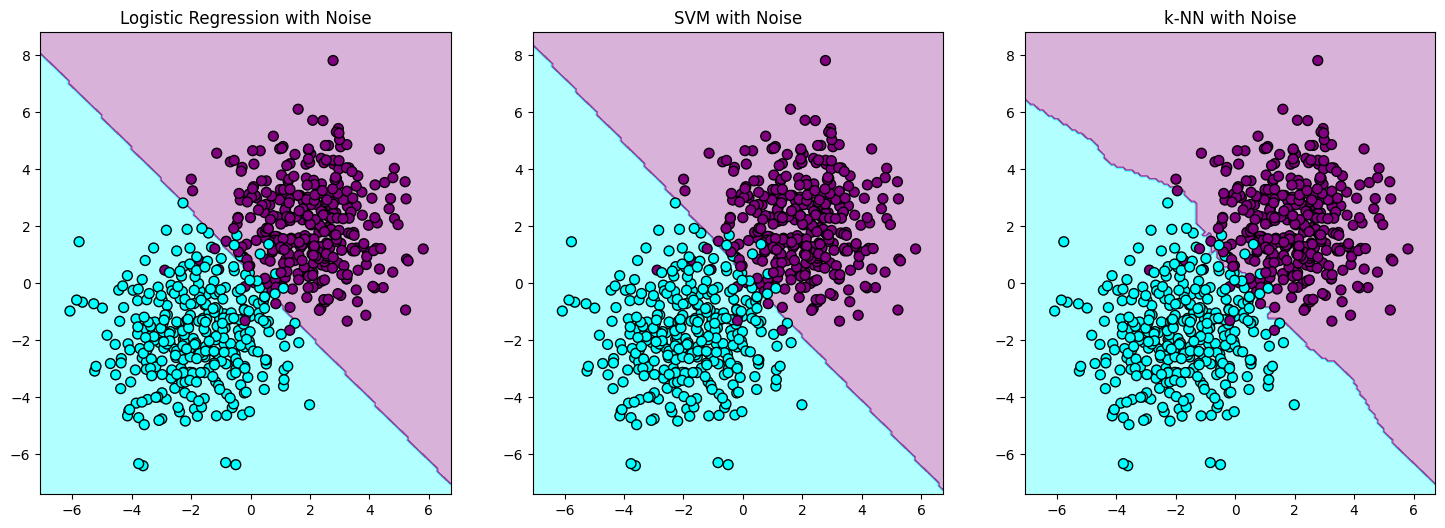

In [9]:

df = pd.read_csv('ls_datahw2.csv')
X = df[['x', 'y']].values
y = df['class'].values
np.random.seed(42)
noise_factor = 0.8  
X_noisy = X + noise_factor * np.random.normal(size=X.shape)

df_noisy = pd.DataFrame(X_noisy, columns=["x", "y"])
df_noisy['class'] = y

X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

log_reg_noisy = LogisticRegression()
log_reg_noisy.fit(X_train_noisy, y_train_noisy)
svm_noisy = SVC(kernel='linear')
svm_noisy.fit(X_train_noisy, y_train_noisy)
knn_noisy = KNeighborsClassifier(n_neighbors=5)
knn_noisy.fit(X_train_noisy, y_train_noisy)
y_pred_log_reg_noisy = log_reg_noisy.predict(X_test_noisy)
y_pred_svm_noisy = svm_noisy.predict(X_test_noisy)
y_pred_knn_noisy = knn_noisy.predict(X_test_noisy)

models_noisy = {
    "Logistic Regression": y_pred_log_reg_noisy,
    "SVM": y_pred_svm_noisy,
    "k-NN": y_pred_knn_noisy
}

for name, y_pred in models_noisy.items():
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test_noisy, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test_noisy, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test_noisy, y_pred):.2f}")
    print("-" * 30)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('cyan', 'purple')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=ListedColormap(('cyan', 'purple')))

plot_decision_boundary(log_reg_noisy, X_train_noisy, y_train_noisy, axs[0])
axs[0].set_title("Logistic Regression")

plot_decision_boundary(svm_noisy, X_train_noisy, y_train_noisy, axs[1])
axs[1].set_title("SVM ")

plot_decision_boundary(knn_noisy, X_train_noisy, y_train_noisy, axs[2])
axs[2].set_title("k-NN")

plt.show()



**Аналіз отриманих результатів**:
1. Логістична регресія показала хороші результати: accuracy 0.98, precision 0.99, recall 0.97. Вона добре справляється, бо дані майже лінійно роздільні, навіть з шумом.
2. SVM дала майже такі ж результати: accuracy 0.98, precision 0.99, recall 0.97. Вона теж добре підходить для лінійних даних, тому результат очікуваний.
3. k-NN трохи слабша: accuracy 0.97, precision 0.99, recall 0.96. Через шум k-NN іноді плутає точки, бо рішення залежить від сусідів, а сусіди можуть належати різним класам. k-NN є нелінійною моделлю і більше чутлива до шуму.
Отже, логістична регресія і SVM найкращі для цих даних, бо дані лінійно роздільні.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


Model: Decision Tree
Accuracy: 0.81
Precision: 0.83
Recall: 0.81
------------------------------
Model: Random Forest
Accuracy: 0.84
Precision: 0.86
Recall: 0.84
------------------------------
Model: Gradient Boosting
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
------------------------------


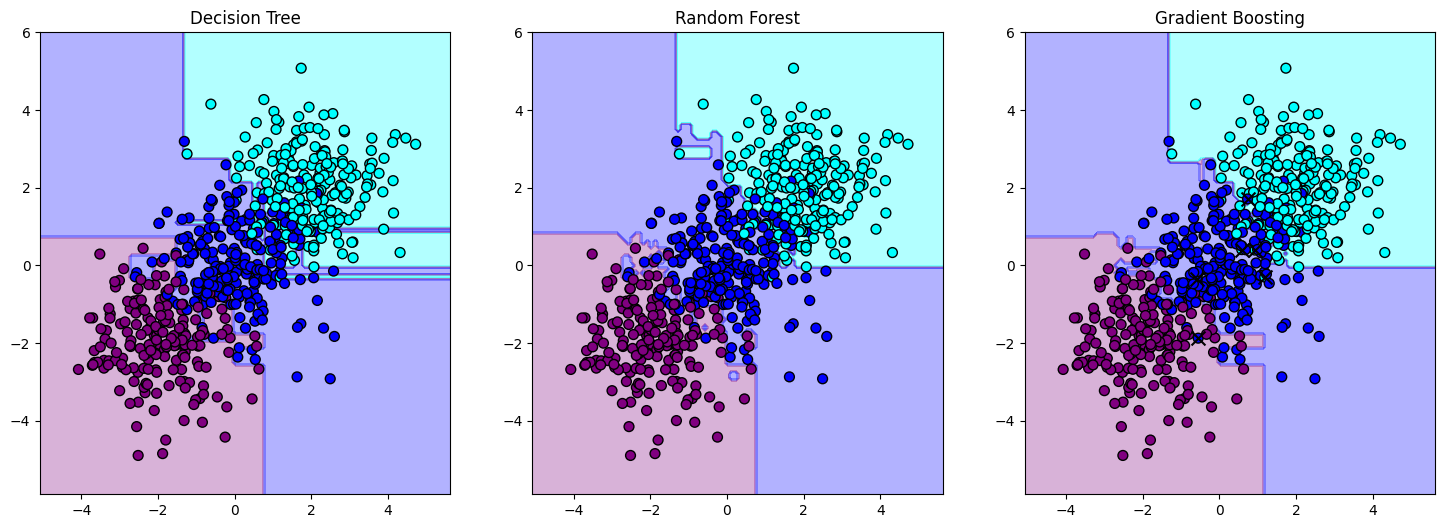

In [21]:

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

df = pd.read_csv('sdatahw2.csv')

X = df[['x', 'y']].values
y = df['class'].values


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
gradient_boosting = GradientBoostingClassifier(n_estimators=100)
gradient_boosting.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
models = {
    "Decision Tree": y_pred_decision_tree,
    "Random Forest": y_pred_random_forest,
    "Gradient Boosting": y_pred_gradient_boosting
}

for name, y_pred in models.items():
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print("-" * 30)

def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('cyan', 'purple', 'blue')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=ListedColormap(('cyan', 'purple', 'blue')))
    
    misclassified = X[model.predict(X) != y]
    ax.scatter(misclassified[:, 0], misclassified[:, 1], c='black', marker='x', s=100, label='Misclassified')
    
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_decision_boundary(decision_tree, X_train, y_train, axs[0], "Decision Tree")
plot_decision_boundary(random_forest, X_train, y_train, axs[1], "Random Forest")
plot_decision_boundary(gradient_boosting, X_train, y_train, axs[2], "Gradient Boosting")

plt.show()




**Аналіз отриманих результатів**:

1. Decision Tree: Accuracy 0.81, Precision 0.83, Recall 0.81
2. Random Forest: Accuracy 0.86, Precision 0.86, Recall 0.86
3. Gradient Boosting: Accuracy 0.86, Precision 0.86, Recall 0.86

Random Forest і Gradient Boosting мають найкращі показники, що свідчить про їхню ефективність у класифікації даних. Обидві моделі працюють на одному рівні, показуючи стабільність у всіх метриках. Decision Tree має трохи гірші результати напевно, через перенавчання на навчальних даних. Це може бути через те, що дерево рішень надто складне або глибоке для цього набору даних, що веде до проблем із узагальненням.
Random Forest і Gradient Boosting підходять краще для цього набору даних, бо вони показують вищу точність і краще справляються з класифікацією. 



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

 k-NN
Accuracy: 0.9467
Precision: 0.9470
Recall: 0.9467

 SVM
Accuracy: 0.9500
Precision: 0.9502
Recall: 0.9500

 Random Forest
Accuracy: 0.9367
Precision: 0.9367
Recall: 0.9367



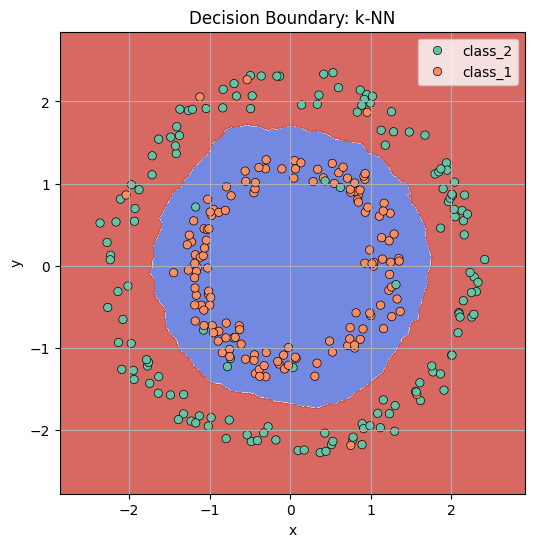

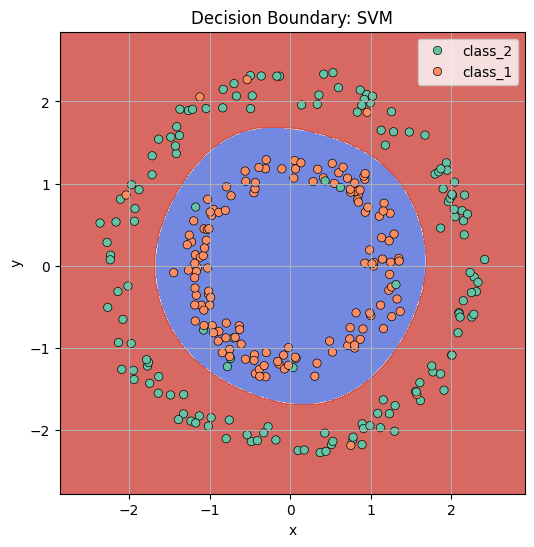

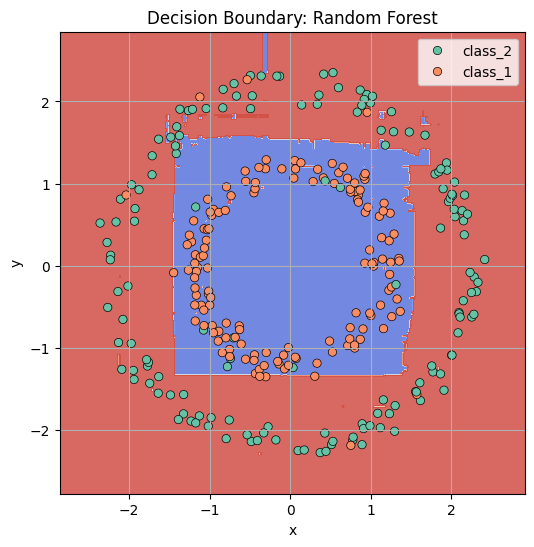

In [11]:
df = pd.read_csv('tdatahw2.csv')

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
X = df[['x', 'y']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

noise_factor = 0.1 
X_train_noisy = X_train + noise_factor * np.random.randn(*X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.randn(*X_test.shape)

def mix_labels(y, mix_ratio=0.1):
    num_samples = len(y)
    num_to_mix = int(mix_ratio * num_samples)
    indices_to_mix = np.random.choice(y.index, num_to_mix, replace=False)  
    y_mixed = y.copy()
    y_mixed.loc[indices_to_mix] = np.random.choice(y.unique(), num_to_mix)
    return y_mixed


y_train_noisy = mix_labels(y_train, mix_ratio=0.1)
y_test_noisy = mix_labels(y_test, mix_ratio=0.1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_noisy, y_train_noisy)
y_pred_knn_noisy = knn.predict(X_test_noisy)

svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train_noisy, y_train_noisy)
y_pred_svm_noisy = svm.predict(X_test_noisy)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_noisy, y_train_noisy)
y_pred_rf_noisy = rf.predict(X_test_noisy)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    
    print(f' {model_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print()


evaluate_model(y_test_noisy, y_pred_knn_noisy, 'k-NN')
evaluate_model(y_test_noisy, y_pred_svm_noisy, 'SVM')
evaluate_model(y_test_noisy, y_pred_rf_noisy, 'Random Forest')


def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X['x'].min() - 0.5, X['x'].max() + 0.5
    y_min, y_max = X['y'].min() - 0.5, X['y'].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


    grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x', 'y'])

    Z = model.predict(grid)  
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    sns.scatterplot(x=X['x'], y=X['y'], hue=label_encoder.inverse_transform(y), palette='Set2', edgecolor='k')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()


plot_decision_boundary(X_test_noisy, y_test_noisy, knn, 'Decision Boundary: k-NN')
plot_decision_boundary(X_test_noisy, y_test_noisy, svm, 'Decision Boundary: SVM')
plot_decision_boundary(X_test_noisy, y_test_noisy, rf, 'Decision Boundary: Random Forest')




**Аналіз отриманих результатів**:

1.   SVM показала найкращі результати з точки зору accuracy,(precision і recall. Це означає, що вона трохи краще впоралася з класифікацією складної топології, ніж інші моделі.
2.   k-NN теж добре справляється, але трохи поступається SVM. Вона часто добре працює для таких завдань, але  страждає від шуму або великої кількості вимірів.
3.   Random Forest показала найгірший результат серед трьох, хоч він теж доволі високий. Ця модель часто краще працює на великих наборах даних з простішою структурою, але з більш складною топологією, може мати труднощі через те, що будує багато дерев рішень, які можуть не відобразити складні зв’язки між точками. 

Тому, якщо коротко, SVM краще адаптувалася до складної топології даних через здатність знаходити оптимальні межі між класами, навіть у випадку, коли дані розташовані в незвичайних формах.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

Logistic Regression
Accuracy: 0.5600
Precision: 0.5426
Recall: 0.5312



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


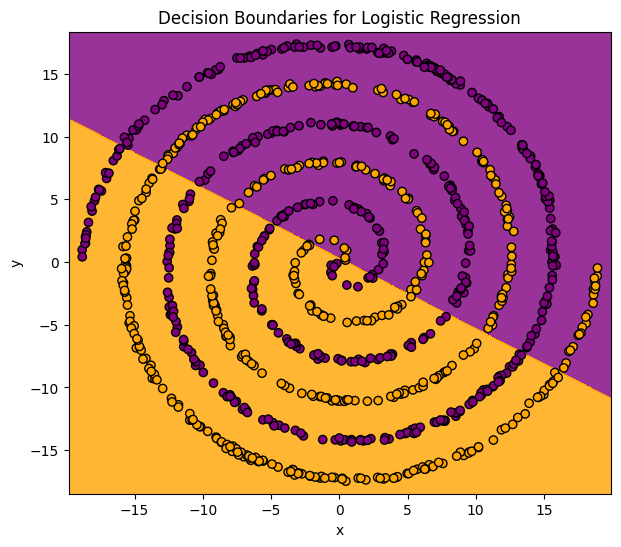

Decision Tree
Accuracy: 0.9800
Precision: 0.9792
Recall: 0.9792



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


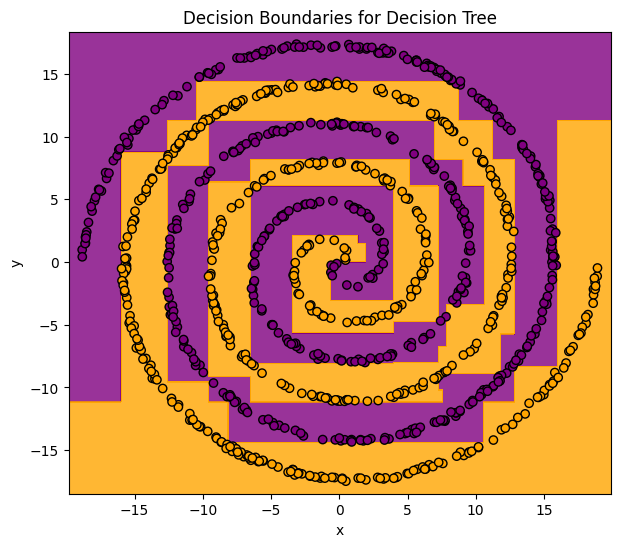

Random Forest
Accuracy: 0.9850
Precision: 0.9697
Recall: 1.0000



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


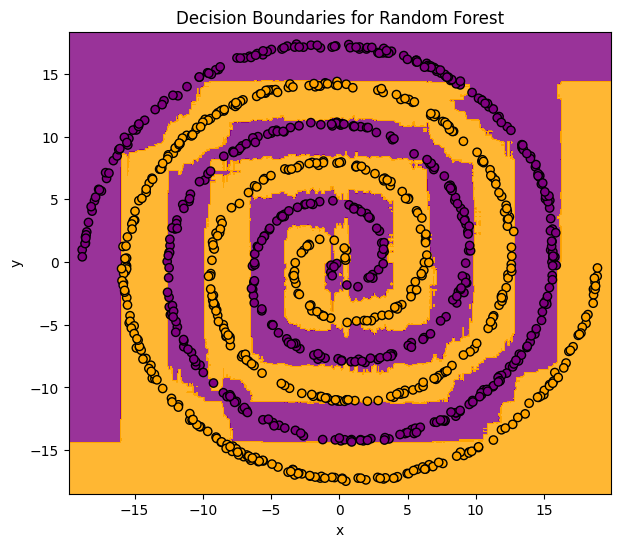

In [28]:

data = pd.read_csv('dshw2.csv')
X = data[['x', 'y']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

def plot_decision_regions(X, y, clf, resolution=0.02):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('purple', 'orange')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(('purple', 'orange')))

for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)  

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\n")

   
    plt.figure(figsize=(7, 6))
    plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=model)  
    plt.title(f'Decision Boundaries for {name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


**Аналіз отриманих результатів**:

1. Logistic Regression показала найнижчі результати з accuracy 0.5600, precision 0.5426 та recall 0.5312. Це свідчить про те, що ця модель не справляється з класифікацією даних, які мають складну структуру, таку як подвійна спіраль.
2. Decision Tree продемонструвала значні поліпшення з fccuracy 0.9800, precision 0.9792 та recall 0.9792. Це говорить про те, що модель може ефективно відділяти класи, але існує ризик перенавчання.
3. Random Forest показала ще кращі результати з accuracy 0.9850, precision 0.9697 та recall 1.0000. Ця модель, завдяки своїй здатності агрегувати результати кількох дерев рішень, досягає високої продуктивності, зокрема у випадках з нелінійними кордонами класів.

Вплив нелінійності на класифікацію- нелінійність у даних, як у випадку з подвійною спіраллю, викликає труднощі для лінійних моделей, таких як логістична регресія. Лінійні моделі намагаються побудувати прямі кордони, що не є достатнім для точного розділення таких складних структур.
Натомість моделі, які здатні моделювати нелінійні взаємозв'язки, такі як дерева рішень та ансамблі (наприклад, Random Forest), забезпечують кращі результати. Вони можуть адаптуватися до складної геометрії даних, намагаючись знайти оптимальні кордони між класами.

Random Forest є найкращою моделлю для класифікації цього типу даних завдяки своїй високій точності та здатності обробляти нелінійні кордони. Вона демонструє ефективність у розділенні класів, які мають складні структури, що свідчить про її здатність справлятися з нелінійними задачами.
